# Modeling Seismic Time-Depth Relationship for 67-1-X-10 Well

## Import libraries and set global parameters

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random
import warnings

# Set Global Parameters
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 14}) # Global command must set in top
plt.rcParams["figure.figsize"]=6,4    #10 x 8 is default figure size in Jupyter Notebook
plt.style.use('seaborn-white')

## Import Data

In [2]:
#Worksheets: Check-Shot, DT, Tops
chk_shot = pd.read_excel ('/Users/davidadvocate/Documents/Python/Data/sE5 67-1-X-10 Chk Shot.xlsx',
                    sheet_name='Check-Shot')
DT       = pd.read_excel ('/Users/davidadvocate/Documents/Python/Data/sE5 67-1-X-10 Chk Shot.xlsx',
                    sheet_name='DT')
Tops     = pd.read_excel ('/Users/davidadvocate/Documents/Python/Data/sE5 67-1-X-10 Chk Shot.xlsx',
                    sheet_name='Tops')

## Examine data

In [3]:
# Examine data sets
#display('Check Shot Data',chk_shot.head(), 'Sonic Log',DT.head(),'Formation Tops', Tops.head())

## Create Time Depth 2nd Order Polynomial
- Follows the general formula: y = b0 + b1x + b2x^2 + b3x^3
- Good reference for fitting data: https://joshualoong.com/2018/10/03/Fitting-Polynomial-Regressions-in-Python/

In [3]:
# Statsmodel method
import statsmodels.formula.api as smf

degree = 2
df = pd.DataFrame(columns=['y', 'x'])
df['x'] = chk_shot['TIME_SEC']
df['y'] = chk_shot['DEPT_FT']

weights = np.polyfit(chk_shot['TIME_SEC'], chk_shot['DEPT_FT'], degree)
b2, b1, b0 = np.poly1d(weights)
model = np.poly1d(weights)
results = smf.ols(formula='y ~ model(x)', data=df).fit()

# Update Check Shot Dataframe with model and calculate residuals
chk_shot['DEPT_MODEL']=(b0 + b1*chk_shot['TIME_SEC'] + b2*chk_shot['TIME_SEC']**2)
chk_shot['DEPT_RESID']=chk_shot['DEPT_FT']-chk_shot['DEPT_MODEL']
chk_shot['RESID_PCT'] =chk_shot['DEPT_RESID']/chk_shot['DEPT_FT']*100

## Plot Data and Trendline

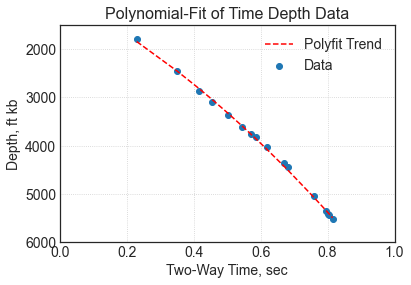

model: 
       2
2529 x + 3589 x + 886.8
R2      :   0.999


In [6]:
# Plot Check Shot Data and Model Fit
plt.scatter(chk_shot['TIME_SEC'], chk_shot['DEPT_FT'], label='Data')
plt.plot(chk_shot['TIME_SEC'],chk_shot['DEPT_MODEL'], c='red', linestyle='--', label='Polyfit Trend')
plt.ylim(6000,1500)
plt.xlim(0,1)
plt.title('Polynomial-Fit of Time Depth Data', fontsize=16)
plt.xlabel('Two-Way Time, sec', fontsize=14)
plt.ylabel('Depth, ft kb', fontsize=14)
plt.legend(shadow=True)
plt.grid(True, linestyle = ':')
plt.show()

print('model: ''\n', model)
print('R2      : ', '{: .03f}'.format(results.rsquared))

## Examine Statsmodel Detailed Results

In [6]:
# Report Model Results
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.122e+04
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           9.81e-22
Time:                        20:48:13   Log-Likelihood:                -81.347
No. Observations:                  16   AIC:                             166.7
Df Residuals:                      14   BIC:                             168.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.387e-12     39.405   6.06e-14      1.000     -84.516      84.516
model(x)       1.0000      0.009    105.907      0.000       0.980       1.020
==============================================================================
Omnibus:                        1.517   Durbin-Watson:                   0.488
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                0.890
Skew:                          -0.145   Prob(JB):                        0.641
Kurtosis:                       1.882   Cond. No.                     1.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Compare Check Shot Depth with Model Depth and Residual Differences

In [5]:
# Examine Actual depth to modeled depth and re
Report = chk_shot[['FM', 'TIME_SEC', 'DEPT_FT', 'DEPT_MODEL', 'DEPT_RESID', 'RESID_PCT']]
display(Report)

,FM,TIME_SEC,DEPT_FT,DEPT_MODEL,DEPT_RESID,RESID_PCT
0,Niobrara White Specks,0.230,1800,1845.924695,-45.924695,-2.551372
1,1st Wall Creek,0.350,2452,2452.566051,-0.566051,-0.023085
2,2nd Wall Creek,0.415,2862,2811.572408,50.427592,1.761970
3,3rd Wall Creek,0.454,3100,3037.233080,62.766920,2.024739
4,Mowry Shale,0.502,3374,3325.529608,48.470392,1.436585
5,Muddy Sandstone,0.545,3608,3593.690486,14.309514,0.396605
6,Dakota Sandstone,0.572,3750,3766.850025,-16.850025,-0.449334
7,Morrison,0.586,3831,3858.087990,-27.087990,-0.707074
8,Sundance,0.618,4038,4070.354322,-32.354322,-0.801246
9,Chugwater/Crow Mtn,0.669,4360,4419.358245,-59.358245,-1.361428


## Executive Summary Plots

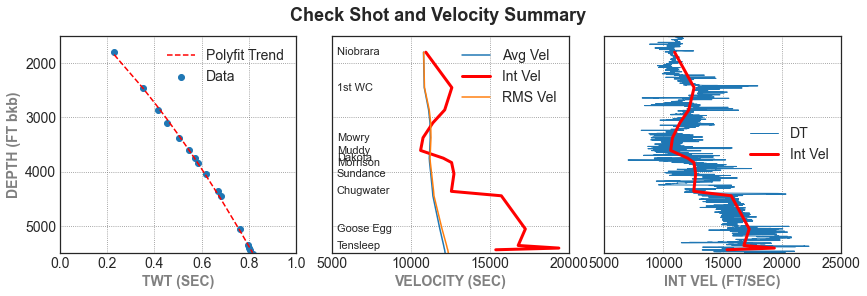

In [8]:
# Summary Plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(14,4), gridspec_kw={'wspace': .15})
ax1.scatter(chk_shot['TIME_SEC'], chk_shot['DEPT_FT'], label='Data')
ax1.plot(chk_shot['TIME_SEC'],chk_shot['DEPT_MODEL'], c='red', linestyle='--', label='Polyfit Trend')
ax2.plot(chk_shot['AVG_VEL_FPS'],chk_shot['DEPT_FT'], label='Avg Vel')
ax2.plot(chk_shot['INT_VEL_FPS'],chk_shot['DEPT_FT'], label='Int Vel', color='r', lw=3)
ax2.plot(chk_shot['RMS_VEL_FPS'],chk_shot['DEPT_FT'], label='RMS Vel')
ax3.plot(DT['DT_FT_SEC'],DT['DEPT_SHIFT'], lw=1, label="DT")
ax3.plot(chk_shot['INT_VEL_FPS'],chk_shot['DEPT_FT'], lw=3, color='r', label='Int Vel')

# Axis Labels
ax1.set_ylabel('DEPTH (FT bkb)', fontsize=14, fontweight='bold', color='gray')
ax1.set_xlabel('TWT (SEC)', fontsize=14, fontweight='bold', color='gray')
ax2.set_xlabel('VELOCITY (SEC)', fontsize=14, fontweight='bold', color='gray')
ax3.set_xlabel('INT VEL (FT/SEC)', fontsize=14, fontweight='bold', color='gray')

# Axis scales, grids and legends
ax1.set_ylim(5500,1500)
ax1.set_xlim(0,1)
ax2.set_xlim(5000,20000)
ax3.set_xlim(5000,25000)
ax1.grid(True, linestyle = ':', color='gray')
ax2.grid(True, linestyle = ':', color='gray')
ax3.grid(True, linestyle = ':', color='gray')
ax1.legend(shadow=True)
ax2.legend(shadow=True)
ax3.legend(shadow=True)
fig.suptitle('Check Shot and Velocity Summary', fontsize=18, fontweight='bold') 

# Add FM Top Annotations
for x_pos, y_pos, label in zip(Tops['DEPT_FT']*0+5000, Tops['DEPT_FT'], Tops['FM']):
    ax2.annotate(label, xy=(x_pos, y_pos), xytext=(5, 0), textcoords='offset points',
                ha='left', va='center', fontsize=11)
plt.show()